
## Лабораторна робота №6
## Студента групи МІТ-31 (підгрупа 2)
## Фіть Владислав Тарасович

### Завдання
 
### 1. Виконати вирішення задачs класифікації для 3 класів з набору даних food101
### 2. Індекси класів визначити індивідуально за залежностями: i1=n-1,i2=n+29,i3=n+59 (де і1,і2,і3 - індекс класу (починаючи з 0) у
### відсортованому за алфавітом наборі даних, n - номер за списком (обчислені значення індексів вказані у даному документі у стовпчиках D:F))
### 3. Отримані результати викласти на github у репозиторій ml2021 в основну (default) гілку в папці Lab6.



In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import zipfile
import pathlib
import numpy as np
import os
import matplotlib.image as mpimg
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [5]:
zip_ref = zipfile.ZipFile("101_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [7]:
main_dir="101_food_classes_10_percent"

data_dir = pathlib.Path("101_food_classes_10_percent/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['apple_pie' 'baby_back_ribs' 'baklava' 'beef_carpaccio' 'beef_tartare'
 'beet_salad' 'beignets' 'bibimbap' 'bread_pudding' 'breakfast_burrito'
 'bruschetta' 'caesar_salad' 'cannoli' 'caprese_salad' 'carrot_cake'
 'ceviche' 'cheese_plate' 'cheesecake' 'chicken_curry'
 'chicken_quesadilla' 'chicken_wings' 'chocolate_cake' 'chocolate_mousse'
 'churros' 'clam_chowder' 'club_sandwich' 'crab_cakes' 'creme_brulee'
 'croque_madame' 'cup_cakes' 'deviled_eggs' 'donuts' 'dumplings' 'edamame'
 'eggs_benedict' 'escargots' 'falafel' 'filet_mignon' 'fish_and_chips'
 'foie_gras' 'french_fries' 'french_onion_soup' 'french_toast'
 'fried_calamari' 'fried_rice' 'frozen_yogurt' 'garlic_bread' 'gnocchi'
 'greek_salad' 'grilled_cheese_sandwich' 'grilled_salmon' 'guacamole'
 'gyoza' 'hamburger' 'hot_and_sour_soup' 'hot_dog' 'huevos_rancheros'
 'hummus' 'ice_cream' 'lasagna' 'lobster_bisque' 'lobster_roll_sandwich'
 'macaroni_and_cheese' 'macarons' 'miso_soup' 'mussels' 'nachos'
 'omelette' 'onion_rings' 'oy

In [8]:
n = 17 #Варіант

l = []
arr = (n - 1, n + 29, n + 59)
for i in range(len(class_names)):
    if i in arr:
        l.append(class_names[i])

print(l)

['cheese_plate', 'garlic_bread', 'pizza']


Image shape: (512, 512, 3)


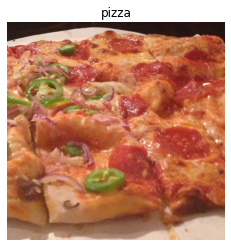

In [15]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

img = view_random_image(target_dir="101_food_classes_10_percent/train/",
                        target_class="pizza")

In [16]:
img

array([[[ 36,  29,  23],
        [ 32,  25,  19],
        [ 31,  24,  18],
        ...,
        [ 30,  15,  18],
        [ 32,  17,  20],
        [ 36,  21,  24]],

       [[ 34,  27,  21],
        [ 33,  26,  20],
        [ 33,  26,  20],
        ...,
        [ 31,  17,  17],
        [ 31,  16,  19],
        [ 33,  18,  21]],

       [[ 33,  26,  20],
        [ 33,  26,  20],
        [ 34,  27,  21],
        ...,
        [ 34,  20,  20],
        [ 32,  17,  20],
        [ 32,  17,  20]],

       ...,

       [[176, 143, 126],
        [174, 141, 122],
        [175, 142, 123],
        ...,
        [225, 194, 176],
        [226, 195, 177],
        [228, 197, 179]],

       [[183, 150, 133],
        [179, 146, 129],
        [177, 144, 127],
        ...,
        [227, 196, 178],
        [227, 196, 178],
        [228, 197, 179]],

       [[192, 159, 142],
        [186, 153, 136],
        [180, 147, 130],
        ...,
        [230, 199, 181],
        [230, 199, 181],
        [231, 200, 182]]

In [17]:
img/255

array([[[0.14117647, 0.11372549, 0.09019608],
        [0.1254902 , 0.09803922, 0.0745098 ],
        [0.12156863, 0.09411765, 0.07058824],
        ...,
        [0.11764706, 0.05882353, 0.07058824],
        [0.1254902 , 0.06666667, 0.07843137],
        [0.14117647, 0.08235294, 0.09411765]],

       [[0.13333333, 0.10588235, 0.08235294],
        [0.12941176, 0.10196078, 0.07843137],
        [0.12941176, 0.10196078, 0.07843137],
        ...,
        [0.12156863, 0.06666667, 0.06666667],
        [0.12156863, 0.0627451 , 0.0745098 ],
        [0.12941176, 0.07058824, 0.08235294]],

       [[0.12941176, 0.10196078, 0.07843137],
        [0.12941176, 0.10196078, 0.07843137],
        [0.13333333, 0.10588235, 0.08235294],
        ...,
        [0.13333333, 0.07843137, 0.07843137],
        [0.1254902 , 0.06666667, 0.07843137],
        [0.1254902 , 0.06666667, 0.07843137]],

       ...,

       [[0.69019608, 0.56078431, 0.49411765],
        [0.68235294, 0.55294118, 0.47843137],
        [0.68627451, 0

In [25]:
tf.random.set_seed(19)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = main_dir+"/train/"
test_dir = main_dir+"/test/"

train_data = train_datagen.flow_from_directory(train_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="sparse",
    seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="sparse",
    seed=42)



model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
    kernel_size=3,
    activation="relu", 
    input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
    padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="softmax")
])

model_1.compile(loss="binary_crossentropy",
  optimizer=tf.keras.optimizers.Adam(),
  metrics=["accuracy"])

history_1 = model_1.fit(train_data,
    epochs=2,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data))

Found 225 images belonging to 3 classes.
Found 750 images belonging to 3 classes.
Epoch 1/2
8/8 [==============================] - 27s 3s/step - loss: 0.0323 - accuracy: 0.3333 - val_loss: -0.3259 - val_accuracy: 0.3333
Epoch 2/2
8/8 [==============================] - 19s 2s/step - loss: -0.4016 - accuracy: 0.3333 - val_loss: -1.3027 - val_accuracy: 0.3333


In [26]:
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 28090)            

<AxesSubplot:title={'center':'History ins_model'}, xlabel='epochs', ylabel='loss'>

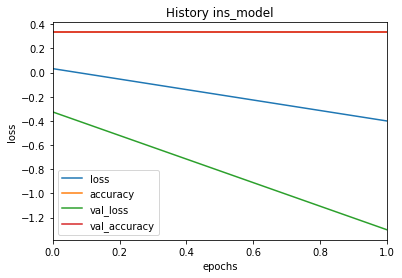

In [27]:
pd.DataFrame(history_1.history).plot(xlabel="epochs", 
ylabel="loss",title="History ins_model", xlim=(0,1))

In [28]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

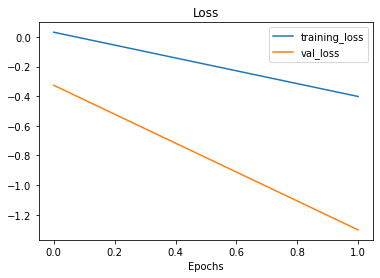

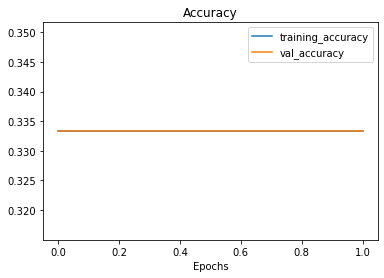

In [29]:
plot_loss_curves(history_1)

In [31]:
model_1.save('model.h5')